# 3 분류

## 3.1 MNIST

In [27]:
from sklearn.datasets import fetch_openml

In [28]:
mnist = fetch_openml('mnist_784', version=1)

In [29]:
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [30]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [31]:
y.shape

(70000,)

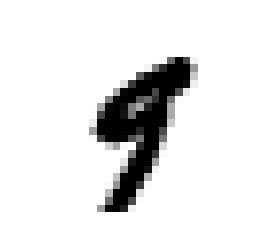

In [32]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000] # 하나
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
          interpolation="nearest")
plt.axis("off")
plt.show()

In [33]:
y[36000]

'9'

In [34]:
# 훈련 테스트 나누기
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [35]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [36]:
shuffle_index

array([33341, 49109, 57552, ..., 24437, 20040, 19895])

## 3.2 이진 분류기 훈련

In [37]:
# 5만 식별하는 분류기
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [38]:
# 확률적 경사 하강법 SGD 분류기 시작하기
# SGD는 온라인 학습과 잘 들어 맞는다.
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
y_train_5

array([False, False, False, ..., False, False, False])

In [40]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
np.unique(y_train_5)

array([False,  True])

In [42]:
sgd_clf.predict([some_digit])

array([False])

## 3.3 성능 측정

### 3.3.1 교차 검증을 사용한 정확도 측정

In [43]:
# 교차 검증 구현
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


0.96645


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


0.95985


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


0.96395


In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier

array([0.96645, 0.95985, 0.96395])

In [46]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [47]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9075 , 0.91165, 0.9098 ])

정확도를 분류기의 성능 측정 지표로 선호하지 않는 이유를 보여준다. 불균형한 데이터셋을 다룰 때 더욱 그렇다

### 3.3.2 오차 행렬

분류기의 성능을 평가하는 더 좋은 방법은 오차 행렬을 조사하는 것이다. 테스트 세트는 제일 마지막에 넣어야 하므로 지금 넣으면 안된다! 

In [48]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier

In [49]:
# confusion_matrix() 함수 사용해 오차 행렬을 만든다
from sklearn.metrics import confusion_matrix


In [50]:
confusion_matrix(y_train_5, y_train_pred)

array([[53376,  1203],
       [  992,  4429]], dtype=int64)

In [51]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

NameError: name 'y_train_perfect_predictions' is not defined

양성 예측 정확도  정밀도
\begin{align}
정밀도 = {TP \over {TP + FP}} \\
\end{align}
확실한 양성 샘플 하나만 예측하면 간단히 완벽한 정밀도를 얻을 수 있지만 이는 분류기가 다른 모든 양성 샘플을 무시하기 때문에 그리 유용하지 않는다. 정밀도는 재현율 같은 다른 지표를 같이 사용하는 것이 일반적이다. 재현율은 분류기가 정확하게 감지한 양성 샘플의 비율로, 민감도 또는 진짜 양성 비율이라고도 한다
\begin{align}
재현율 = {TP \over {TP + FN}} \\
\end{align}

### 3.3.3 정밀도와 재현율

In [52]:
from sklearn.metrics import precision_score, recall_score

In [53]:
precision_score(y_train_5, y_train_pred)

0.7863991477272727

In [54]:
recall_score(y_train_5, y_train_pred)

0.8170079321158458

F1 점수는 정밀도와 재현율의 조화 평균이다

\begin{align}
F_1 &= {2 \over {{1 \over 정밀도} + {1 \over 재현율}}} &= 2 \times {정밀도 \times 재현율 \over {정밀도 + 재현율}} &= {TP \over {TP + {FN + FP \over 2}}}
\end{align}

In [55]:
# f1_score() 함수 호출
from sklearn.metrics import f1_score

In [56]:
f1_score(y_train_5, y_train_pred)

0.8014113815253776

정밀도와 재현율이 비슷한 분류기에서는 F1 점수가 높다. 항상 좋은 것은 아니다. 상황에 따라 정밀도가 중요할 수도 있고 재현율이 중요할 수도 있다.

### 3.3.4 정밀도/재현율 트레이드오프

결정 함수를 사용하면 각 샘플의 점수를 계산한다. 이 점수가 임계값보다 크면 샘플을 양성 클래에 할당하고 그렇지 않으면 음성 클래스에 할당한다. 

In [57]:
# 사이킷런에서 임곗값을 직접 지정할 수 없지만 예측에 사용한 점수는 확인할 수 있다. 분류기 predict() 대신
# decision_function() 메서드를 호출하면 각 샘플의 점수를 얻을 수 있다.
y_scores = sgd_clf.decision_function([some_digit])

In [58]:
y_scores

array([-317077.4104453])

In [59]:
threshold = 0

In [60]:
y_some_digit_pred = (y_scores > threshold)

In [61]:
y_some_digit_pred

array([False])

In [62]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [63]:
# cross_val_predict() 함수를 사용해 훈련 세트에 있는 모든 샘플의 점수를 구해야 한다
# 예측 결과가 아니라 결정 점수를 반환받도록 지정한다
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method="decision_function")

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier

In [64]:
# precision_recall_curve()   함수를 사용하여 가능한 모든 임곗값에 대해 정밀도와 재현율 계산
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

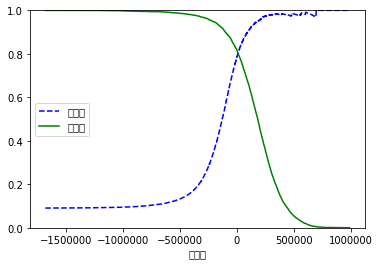

In [65]:
# 임계값의 함수로 정밀도와 재현율을 그린다
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="정밀도")
    plt.plot(thresholds, recalls[:-1], "g-", label="재현율")
    plt.xlabel("임계값")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [66]:
plt.rcParams["font.family"] = 'd2coding'
plt.rcParams["font.size"] = 20

In [67]:
y_train_pred_90 = (y_scores > 70000)

In [68]:
precision_score(y_train_5, y_train_pred_90)

0.8810933940774488

In [69]:
recall_score(y_train_5, y_train_pred_90)

0.7135214904999078

### 3.3.5 ROC 곡선

**수신기 조작 특성**(ROC) 곡선도 이진 분류에서 널리 사용하는 도구이다. 정밀도/재현율 곡선과 비슷하지만, ROC 곡선은 정밀도에 대한 재현율 곡선이 아니고 거짓 양성 비율(FPR)에 대한 진짜 양성 비율(TPR)의 곡선이다. 이는 1에서 진짜 음성 비율(TNR)을 뺀 값이다. TNR을 $ 특이도^{specificity} $라고도 한다. ROC 곡선은 민감도(재현율)에 대한 1 - 특이도 그래프다.

In [70]:
# ROC 곡선을 그리려면 먼저 roc_curve() 함수를 사용해 여러 임계값에서 TPR과 FPR을 계산해야 한다
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

$ FPR = {FP \over {FP + TN}} = {FP + TN - FN \over {FP + TN}} = 1 - {TN \over {FP + TN}} = 1 - TNR $

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['d2coding'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


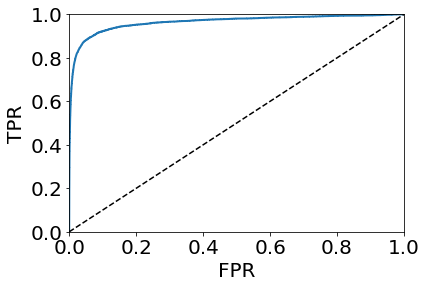

In [71]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
plot_roc_curve(fpr, tpr)

여기에서 트레이드오프가 있다. 재현율 (TPR)이 높을 수록 분류기가 만드는 거짓 양성 (FPR)이 늘어난다. 점선은 완전한 랜덤 분류기의 ROC 곡선을 뜻한다. 좋은 분류기는 이 점선으로 최대한 멀리 떨어져야 한다.
**곡선 아래의 면적**(AUC)을 측정하면 분류기들을 비교할 수 있다. 완벽한 분류기는 ROC의 AUC가 1이고, 완전한 랜덤 분류기는 0.5이다. 사이킷런 ROC의 AUC를 계산하는 함수를 제공한다.

In [72]:
from sklearn.metrics import roc_auc_score

In [73]:
roc_auc_score(y_train_5, y_scores)

0.964137962427288

TIP 양성 클래스가 드물거나 거짓 음성보다 거짓 양성이 더 중요할 때 PR 곡선 사용. 아니면 ROC 곡선 사용

In [74]:
# RandomForestClassifier를 훈련시킨다. decision_function() 메서드는 없다. 대신 predict_proba() 메서드가 있다
# predict_proba() 메서드는 샘플이 행, 클래스가 열이고 샘플이 주어진 클래스에 속할 확률을 담은 배열 반환
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method="predict_proba")

In [75]:
y_probas_forest

array([[1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ]])

In [76]:
y_scores_forest = y_probas_forest[:, 1] # 양성 클래스에 대한 확률을 점수로 사용
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['d2coding'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


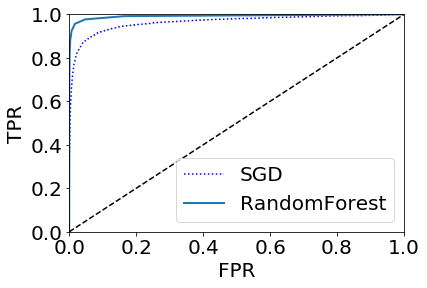

In [77]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, "RandomForest")
plt.legend(loc="lower right")
plt.show()

In [78]:
roc_auc_score(y_train_5, y_scores_forest)

0.9920911221840466

 ## 3.4 다중 분류

일부 알고리즘은 여러 개의 클래스를 직접 처리할 수 있지만, 다른 알고리즘은 이진 분류만 가능하다. 이진 분류기를 여러 개 사용해 다중 클래스를 분류하는 기법도 많다. 
이미지를 분류할 때 분류기의 결정 점수 중 가장 높은 것을 클래스로 선택하는 **일대다** 전략 사용
다른 0과 1구별, 0과 2구별 등과 같이 각 숫자의 조합마다 이진 분류기를 훈련시키는 것이 **일대일** 전략이라 한다.클래스가 $N$개 이면 $N\times(N-1)/2$개가 필요한다

In [79]:
# 다중 클래스 분류 작업에 이진 분류 알고리즘을 선택하면 사이킷런이 자동으로 감지해 OvA(SVM은 OvO)를 적용
sgd_clf.fit(X_train, y_train) # y_train_5가 아니고 y_train을 사용
sgd_clf.predict([some_digit])

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


array(['4'], dtype='<U1')

In [80]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [81]:
some_digit_scores

array([[-909661.95130656, -481821.0022887 , -608477.29133535,
        -132225.3227984 ,   26385.27856417, -317077.4104453 ,
        -875365.68914801, -201952.04815525, -340810.56345052,
         -11282.43698509]])

In [82]:
np.argmax(some_digit_scores)

4

In [83]:
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [84]:
sgd_clf.classes_[5]

'5'

사이킷런에서 OvO나 OvA를 사용하도록 강제하려면  OneVsOneClassifier나 OneVsRestClassifier를 사용. 

In [85]:
# SGDClassifier 기반으로 OvO 전략 사용
from sklearn.multiclass import OneVsOneClassifier

In [86]:
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))

In [87]:
ovo_clf.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
          n_jobs=None)

In [88]:
ovo_clf.predict([some_digit])

array(['4'], dtype=object)

In [89]:
len(ovo_clf.estimators_)

45

In [90]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [91]:
forest_clf.predict([some_digit])

array(['9'], dtype=object)

랜덤 포레스트 분류기는 직접 샘플을 다중 클래스로 분류할 수 있기 때문에 별도로 사이킷런의 OvA나 OvO를 적용할 필요가 없다. predict_proba() 메서드를 호출하면 분류기가 각 샘플에 부여할 클래스별 확률을 얻을 수 있다.

In [92]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [93]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier

array([0.84728054, 0.84564228, 0.86838026])

In [94]:
# 입력 스케일을 조정하여 정확도 90% 이상 높이기
from sklearn.preprocessing import StandardScaler

In [95]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [96]:
cross_val_score(sgd_clf,X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier

array([0.90876825, 0.9119456 , 0.9119868 ])

## 3.5 에러 분석

In [97]:
# cross_val_predict() 함수를 사용해 예측을 만들고 이전처럼 confusion_matrix() 함수 호출
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier

In [98]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [99]:
conf_mx

array([[5735,    2,   25,   10,   11,   43,   45,    8,   40,    4],
       [   1, 6477,   50,   24,    7,   38,    9,   12,  110,   14],
       [  53,   36, 5356,   91,   79,   29,   77,   56,  163,   18],
       [  47,   40,  140, 5326,    2,  247,   36,   51,  140,  102],
       [  21,   29,   44,    6, 5383,    7,   54,   29,   82,  187],
       [  65,   38,   43,  169,   75, 4639,   99,   30,  172,   91],
       [  28,   28,   53,    2,   43,   97, 5615,    6,   45,    1],
       [  27,   19,   75,   23,   56,   10,    5, 5788,   15,  247],
       [  48,  140,   72,  140,   15,  169,   56,   24, 5042,  145],
       [  43,   32,   25,   81,  166,   35,    3,  193,   78, 5293]],
      dtype=int64)

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['d2coding'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


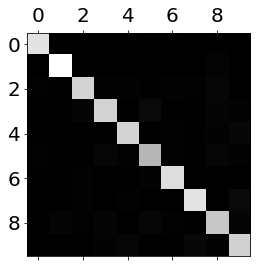

In [100]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [101]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['d2coding'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


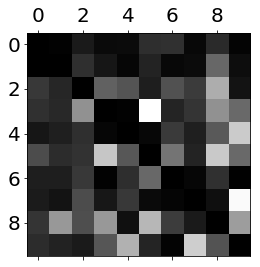

In [102]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [103]:
# 숫자 그림을 위한 추가 함수
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['d2coding'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


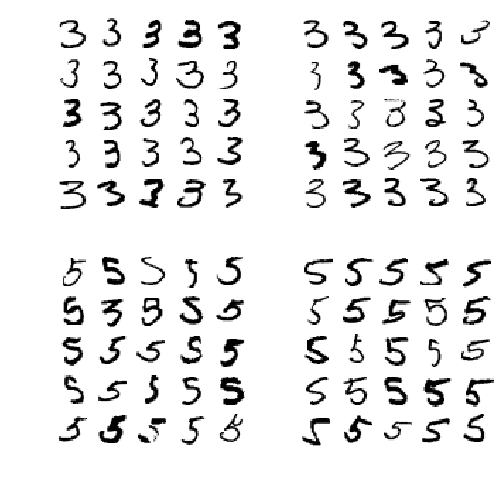

In [104]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [105]:
X_aa

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 3.6 다중 레이블 분류

In [106]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype(int) % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
knn_clf.predict([some_digit])

In [ ]:
# 모든  레이블에 대한  $F_1$ 점수의 평균을 계산
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3,
                                    n_jobs=-1)

In [ ]:
f1_score(y_multilabel, y_train_knn_pred, average="macro")

## 3.7 다중 출력 분류

In [ ]:
#  randint() 함수를 사용하여 픽셀 강도에 노이즈를 추가
noise = rnd.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = rnd.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)